# Import Statements

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data = pd.read_csv('HDB5V2.3_cleaned.csv')
display(data.head())
display(data.info())
display(data.describe())

,Unnamed: 0,AUXHEAT,PELLET,CONFIG,RGEO,AMIN,KAPPA,KAREA,DELTAU,DELTAL,...,TIV,TAUTOT],PGASA,BGASA,BGASZ,BGASA2,BGASZ2,XGASZ,XGASA,TAUTH
0,0,8.0,5.0,1.0,1.668,0.3840,1.0420,1.0420,0.0,0.0,...,-418.048510,0.08862,2.0,0,0,0,0,0,0.0,0.08862
1,1,8.0,5.0,1.0,1.668,0.3839,1.0420,1.0420,0.0,0.0,...,-417.943803,0.08790,2.0,0,0,0,0,0,0.0,0.08790
2,2,8.0,5.0,1.0,1.668,0.3840,1.0420,1.0420,0.0,0.0,...,-425.743199,0.09646,2.0,0,0,0,0,0,0.0,0.09646
3,4,4.0,5.0,1.0,1.698,0.4065,0.9842,0.9840,0.0,0.0,...,655.140220,0.07826,2.0,1,1,0,0,0,0.0,0.10650
4,5,4.0,5.0,1.0,1.694,0.4101,0.9752,0.9748,0.0,0.0,...,759.415986,0.04871,2.0,1,1,0,0,0,0.0,0.05100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13793 entries, 0 to 13792
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13793 non-null  int64  
 1   AUXHEAT     13793 non-null  float64
 2   PELLET      13793 non-null  float64
 3   CONFIG      13793 non-null  float64
 4   RGEO        13793 non-null  float64
 5   AMIN        13793 non-null  float64
 6   KAPPA       13793 non-null  float64
 7   KAREA       13793 non-null  float64
 8   DELTAU      13793 non-null  float64
 9   DELTAL      13793 non-null  float64
 10  AREA        13793 non-null  float64
 11  VOL         13793 non-null  float64
 12  SURFFORM    13793 non-null  float64
 13  SEPLIM      13793 non-null  float64
 14  WALMAT      13793 non-null  float64
 15  DIVMAT      13793 non-null  float64
 16  LIMMAT      13793 non-null  float64
 17  EVAP        13793 non-null  float64
 18  BT          13793 non-null  float64
 19  IP          13793 non-nul

None

,Unnamed: 0,AUXHEAT,PELLET,CONFIG,RGEO,AMIN,KAPPA,KAREA,DELTAU,DELTAL,...,TIV,TAUTOT],PGASA,BGASA,BGASZ,BGASA2,BGASZ2,XGASZ,XGASA,TAUTH
count,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,...,13793.000000,1.379300e+04,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000,13793.000000
mean,7204.614805,5.237729,4.347133,5.264264,2.182434,0.699366,1.568934,1.468456,10.995576,-7.058471,...,1220.019740,2.894884e-01,1.955196,1.463351,0.779743,0.648445,0.331762,1.407018,2.824262,0.257738
std,4042.926023,1.735762,1.442687,2.206162,0.698051,0.293507,0.331326,0.276702,23.635696,15.985530,...,1958.046956,3.021308e-01,0.303426,0.851662,0.422749,0.944759,0.481070,3.439515,7.044635,0.283219
min,0.000000,0.000000,0.000000,0.000000,0.280400,0.158500,0.803800,0.930800,-32.304820,-109.790861,...,-4341.634096,-9.999000e-09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002236
25%,3728.000000,4.000000,5.000000,4.000000,1.650000,0.460000,1.390000,1.325000,0.000000,-1.354166,...,415.022492,5.963000e-02,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.057450
50%,7243.000000,4.000000,5.000000,6.000000,1.750000,0.607940,1.712168,1.555174,0.178800,0.240468,...,1285.543759,1.280000e-01,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.116900
75%,10704.000000,7.000000,5.000000,7.000000,2.889312,0.946400,1.795000,1.643623,2.663568,0.370100,...,2108.230469,4.566477e-01,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.387600
max,14152.000000,8.000000,5.000000,9.000000,3.460000,1.221000,2.648000,2.435000,162.086070,22.558265,...,20860.000000,1.826000e+00,14.010000,4.000000,2.000000,4.000000,2.000000,36.000000,83.800000,1.790000


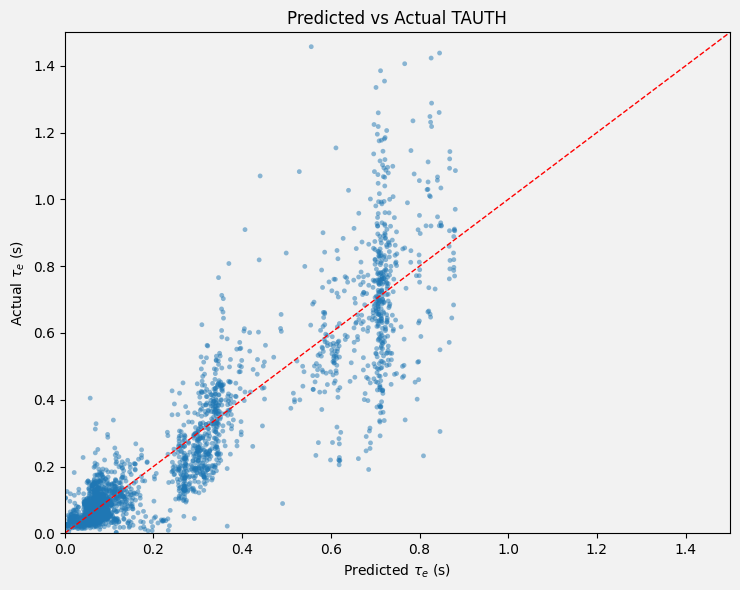

In [3]:
cols = data.columns
cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']
data_new = data[cols_keep + ['TAUTH']]
X = data_new.drop(columns=['TAUTH'], axis=1).values
y = data_new['TAUTH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

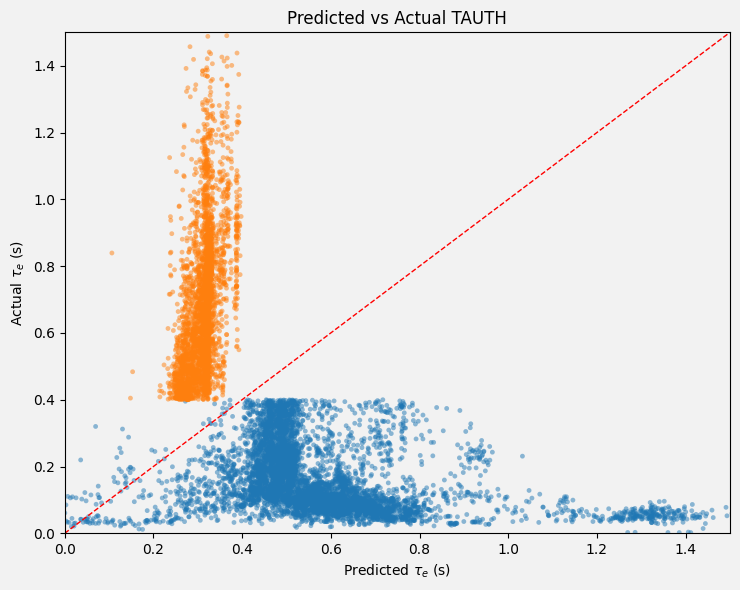

In [4]:
X2 = X[y > 0.4]
y2 = y[y > 0.4]
X3 = X[y <= 0.4]
y3 = y[y <= 0.4]

X_train, X_test, y_train, y_test = X2, X3, y2, y3
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')


X_train, X_test, y_train, y_test = X3, X2, y3, y2
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

<Axes: >

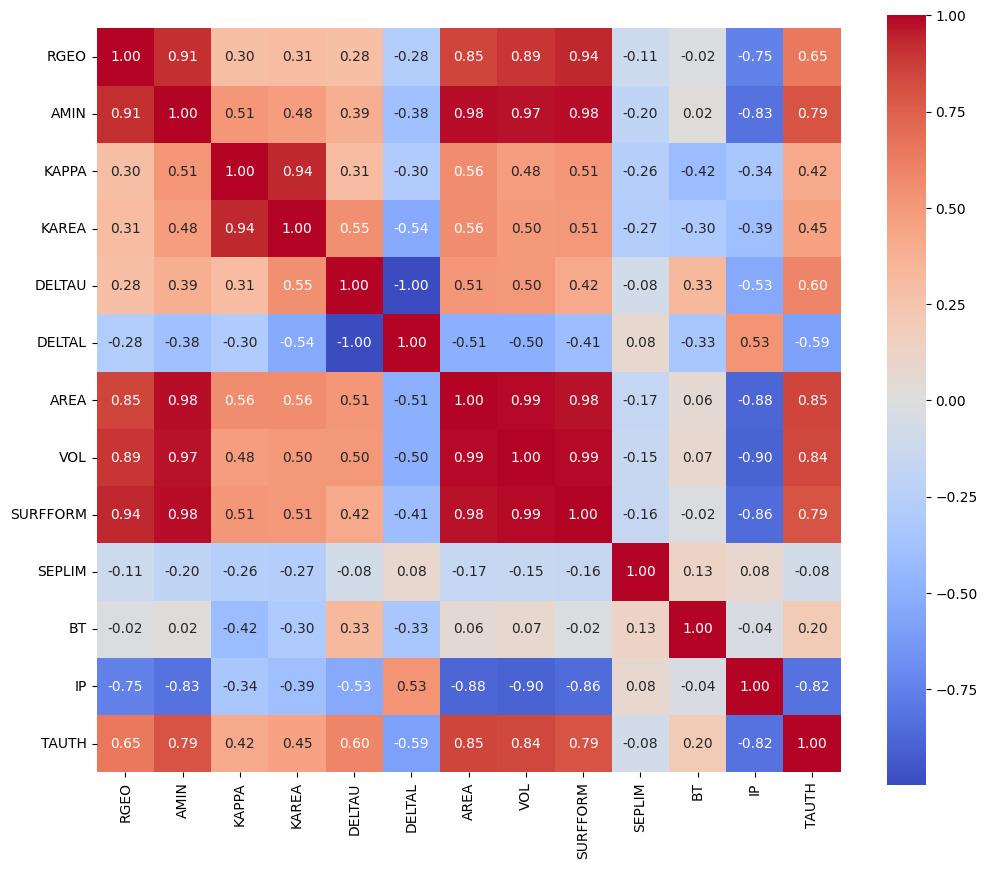

In [5]:
#correlation scatter plots
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(data_new.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

array([[<Axes: title={'center': 'RGEO'}>,
        <Axes: title={'center': 'AMIN'}>,
        <Axes: title={'center': 'KAPPA'}>,
        <Axes: title={'center': 'KAREA'}>],
       [<Axes: title={'center': 'DELTAU'}>,
        <Axes: title={'center': 'DELTAL'}>,
        <Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'VOL'}>],
       [<Axes: title={'center': 'SURFFORM'}>,
        <Axes: title={'center': 'SEPLIM'}>,
        <Axes: title={'center': 'BT'}>, <Axes: title={'center': 'IP'}>],
       [<Axes: title={'center': 'TAUTH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

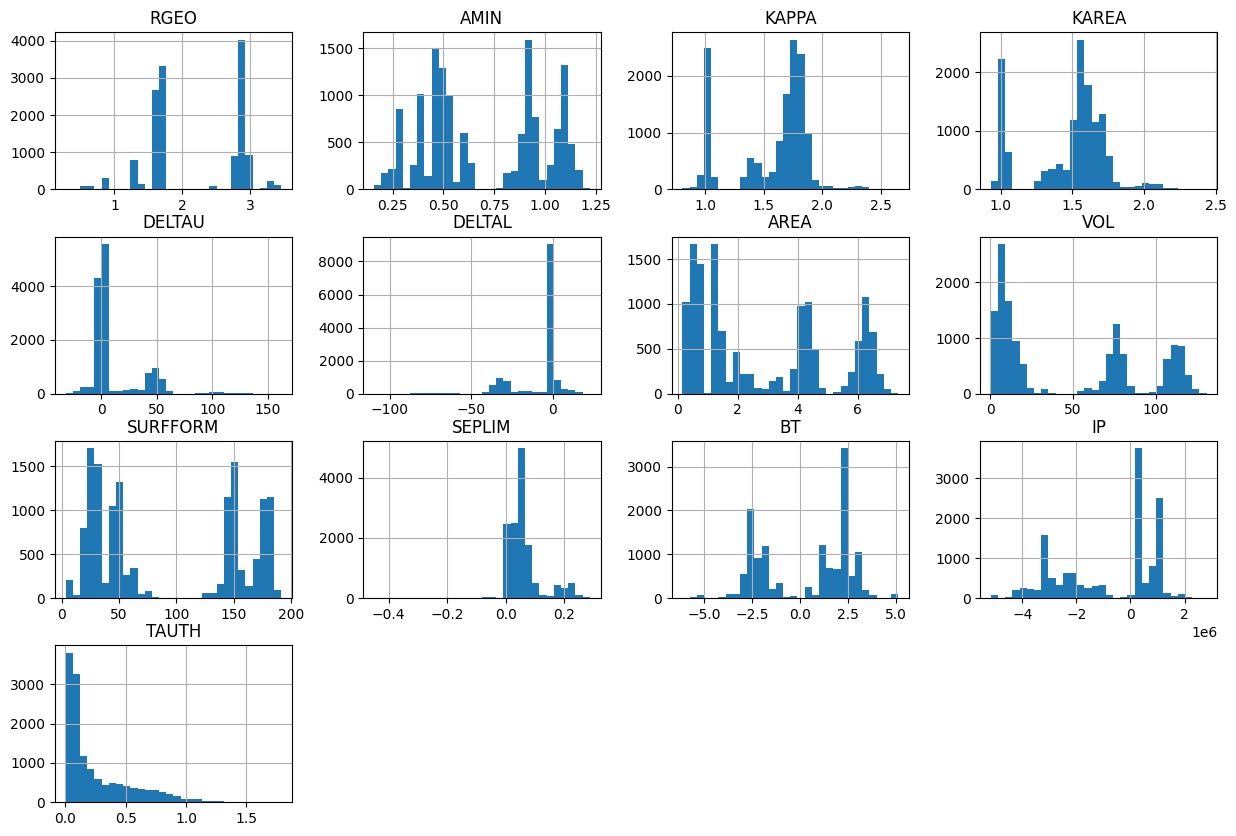

In [6]:
# Show histograms of features
data_new.hist(bins=30, figsize=(15,10))

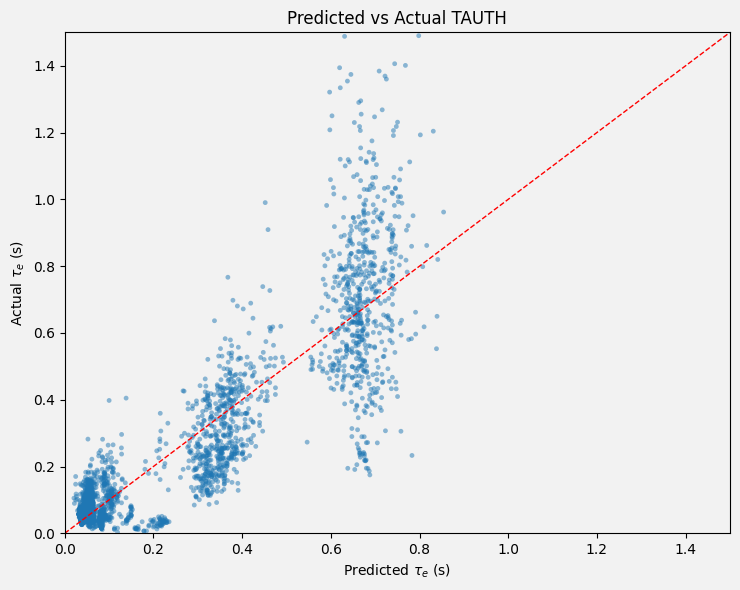

In [7]:
cols = data.columns
cols_keep = ['AMIN', 'AREA', 'VOL', 'SURFFORM', 'IP']
data_new2 = data[cols_keep + ['TAUTH']]
X = data_new2.drop(columns=['TAUTH'], axis=1).values
y = data_new2['TAUTH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13793 entries, 0 to 13792
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RGEO      13793 non-null  float64
 1   AMIN      13793 non-null  float64
 2   KAPPA     13793 non-null  float64
 3   KAREA     13793 non-null  float64
 4   DELTAU    13793 non-null  float64
 5   DELTAL    13793 non-null  float64
 6   AREA      13793 non-null  float64
 7   VOL       13793 non-null  float64
 8   SURFFORM  13793 non-null  float64
 9   SEPLIM    13793 non-null  float64
 10  BT        13793 non-null  float64
 11  IP        13793 non-null  float64
dtypes: float64(12)
memory usage: 1.3 MB


None

Using device: cuda
Epoch  1 | Train MSE 1.025902 | Val MSE 0.178779
Epoch  5 | Train MSE 0.819588 | Val MSE 0.135304
Epoch 10 | Train MSE 0.635458 | Val MSE 0.092761
Epoch 15 | Train MSE 0.487197 | Val MSE 0.061410
Epoch 20 | Train MSE 0.360005 | Val MSE 0.039994
Epoch 25 | Train MSE 0.255389 | Val MSE 0.028905
Epoch 30 | Train MSE 0.164369 | Val MSE 0.032858

Test metrics:
 MAE  : 0.116905
 RMSE : 0.162982
 R^2  : 0.633810


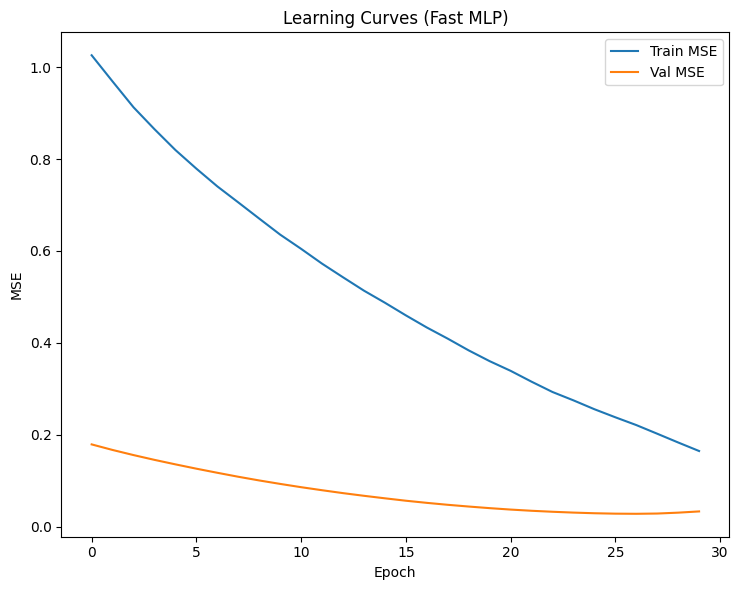

Text(0, 0.5, 'Actual $\\tau_e$ (s)')

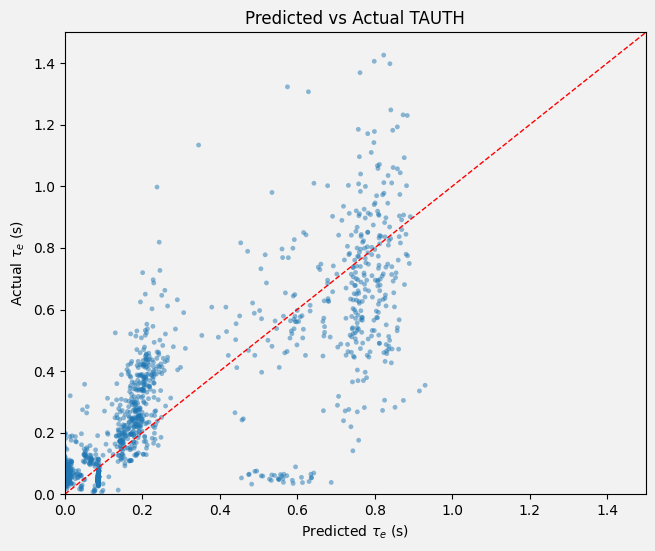

In [8]:
# Ultra-fast training pass to complete within time limit.
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KernelDensity

def make_kde_weights(y, bandwidth=0.15, eps=1e-12, normalize="mean"):
    # Fit KDE on the training y
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth)
    kde.fit(y.reshape(-1,1))
    # log density → density
    log_d = kde.score_samples(y.reshape(-1,1))
    d = np.exp(log_d).astype(np.float32)
    w = 1.0 / (d + eps)
    if normalize == "mean":
        w /= w.mean()
    elif normalize == "sum":
        w /= w.sum()
    return w.astype(np.float32)


csv_path = "HDB5V2.3_cleaned.csv"
df = pd.read_csv(csv_path)

target_col = "TAUTH"
feature_cols = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']
#feature_cols = ['AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']

df_model = df.dropna(subset=[target_col] + feature_cols).copy()

display(df_model[feature_cols].info())
X = df_model[feature_cols].values.astype(np.float32)
y = df_model[target_col].values.astype(np.float32)

finite_mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
X = X[finite_mask]
y = y[finite_mask]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# After creating y_train (log-transformed if log_target=True)
train_weights = make_kde_weights(y_train, bandwidth=0.15, eps=1e-12, normalize="mean")
batch_size = 1024

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

class ArrayDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TensorDataset(torch.tensor(X_train_scaled), 
                         torch.tensor(y_train).view(-1,1),
                         torch.tensor(train_weights).view(-1,1))
val_ds   = TensorDataset(torch.tensor(X_val_scaled), torch.tensor(y_val).view(-1,1))
test_ds  = TensorDataset(torch.tensor(X_test_scaled), torch.tensor(y_test).view(-1,1))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size*2, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=batch_size*2, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

input_dim = X_train.shape[1]

class MLP(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 32),
            nn.SELU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )
    def forward(self, x):
        return self.net(x)

model = MLP(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

epochs = 30
train_losses, val_losses = [], []
best_val = np.inf
best = None

for epoch in range(1, epochs+1):
    model.train()
    tr_loss = 0.0
    n_tr_w = 0.0
    for xb, yb, wb in train_loader:
        xb, yb, wb = xb.to(device), yb.to(device), wb.to(device)
        optimizer.zero_grad(set_to_none=True)
        pred = model(xb)
        # Weighted MSE: sum(w * err^2) / sum(w)
        err2 = (pred - yb) ** 2
        loss = (wb * err2).sum() / (wb.sum() + 1e-12)
        loss.backward()
        optimizer.step()

        tr_loss += (wb * err2).sum().item()
        n_tr_w  += wb.sum().item()
    tr_loss /= max(n_tr_w, 1e-12)
    train_losses.append(tr_loss)

    model.eval()
    va_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            va_loss += criterion(model(xb), yb).item() * xb.size(0)
    va_loss /= len(val_ds)
    val_losses.append(va_loss)

    if va_loss < best_val - 1e-6:
        best_val = va_loss
        best = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if epoch % 5 == 0 or epoch == 1:
        print(f"Epoch {epoch:2d} | Train MSE {tr_loss:.6f} | Val MSE {va_loss:.6f}")

if best is not None:
    model.load_state_dict(best)

# Evaluate test
model.eval()
with torch.no_grad():
    preds, y_true = [], []
    for xb, yb in test_loader:
        xb = xb.to(device)
        p = model(xb).cpu().numpy().ravel().tolist()
        preds.extend(p)
        y_true.extend(yb.numpy().ravel().tolist())

y_true = np.array(y_true)
y_pred = np.array(preds)

mae = mean_absolute_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nTest metrics:")
print(f" MAE  : {mae:.6f}")
print(f" RMSE : {rmse:.6f}")
print(f" R^2  : {r2:.6f}")

# Save artifacts
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 6))
plt.plot(train_losses, label="Train MSE")
plt.plot(val_losses, label="Val MSE")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.title("Learning Curves (Fast MLP)"); plt.legend(); plt.tight_layout()
plt.show()

#Predict TAUTH for test set
with torch.no_grad():
    preds, y_true = [], []
    for xb, yb in test_loader:
        xb = xb.to(device)
        p = model(xb).cpu().numpy().ravel().tolist()
        preds.extend(p)
        y_true.extend(yb.numpy().ravel().tolist())

y_true = np.array(y_true)
y_pred = np.array(preds)
fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_true, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_rf_pred = rf_model.predict(X_test_scaled)


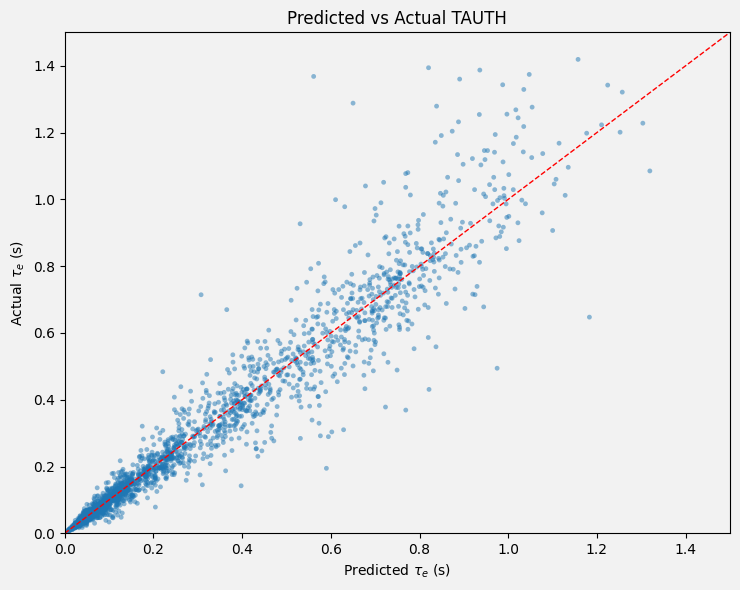

In [10]:
cols = data.columns
cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']
data_new = data[cols_keep + ['TAUTH']]
X = data_new.drop(columns=['TAUTH'], axis=1).values
y = data_new['TAUTH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

In [11]:
# Source - https://stackoverflow.com/a
# Posted by Beltino Goncalves, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-07, License - CC BY-SA 4.0

import sys
!{sys.executable} -m pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
cols = data.columns
cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP', 'BGASZ', 'PGASA', 'BGASA', 'BGASA2', 'XGASZ', 'XGASA', 'BGASZ2']
data_new = data[cols_keep + ['TAUTH']]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13793 entries, 0 to 13792
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RGEO      13793 non-null  float64
 1   AMIN      13793 non-null  float64
 2   KAPPA     13793 non-null  float64
 3   KAREA     13793 non-null  float64
 4   DELTAU    13793 non-null  float64
 5   DELTAL    13793 non-null  float64
 6   AREA      13793 non-null  float64
 7   VOL       13793 non-null  float64
 8   SURFFORM  13793 non-null  float64
 9   SEPLIM    13793 non-null  float64
 10  BT        13793 non-null  float64
 11  IP        13793 non-null  float64
 12  BGASZ     13793 non-null  int64  
 13  PGASA     13793 non-null  float64
 14  BGASA     13793 non-null  int64  
 15  BGASA2    13793 non-null  int64  
 16  XGASZ     13793 non-null  int64  
 17  XGASA     13793 non-null  float64
 18  BGASZ2    13793 non-null  int64  
 19  TAUTH     13793 non-null  float64
dtypes: float64(15), int64(5)
mem

XGBoost MAE: 0.03704221037297055


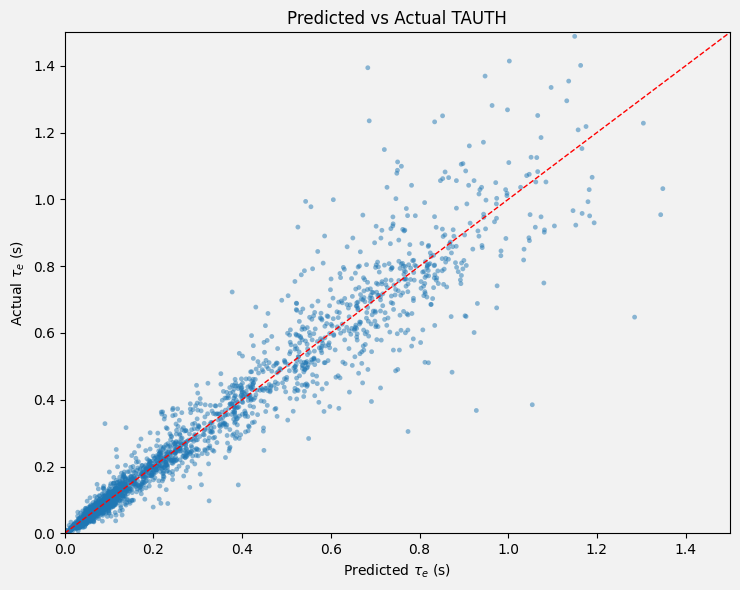

In [25]:
#import xgboost as xgb
import xgboost as xgb

cols = data.columns
#cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']
cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP', 'BGASZ', 'PGASA', 'BGASA', 'BGASA2', 'XGASZ', 'XGASA', 'BGASZ2']
data_new = data[cols_keep + ['TAUTH']]
X = data_new.drop(columns=['TAUTH'], axis=1).values
y = data_new['TAUTH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE:", mae)

fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

2759
Number of times MAE < STD over perturbations: 168 out of 250
Fraction: 0.6720
Predicted TAUTH: 0.9976, Actual TAUTH: 1.6760
RMSE between Predicted Means and Actual TAUTH: 0.108570


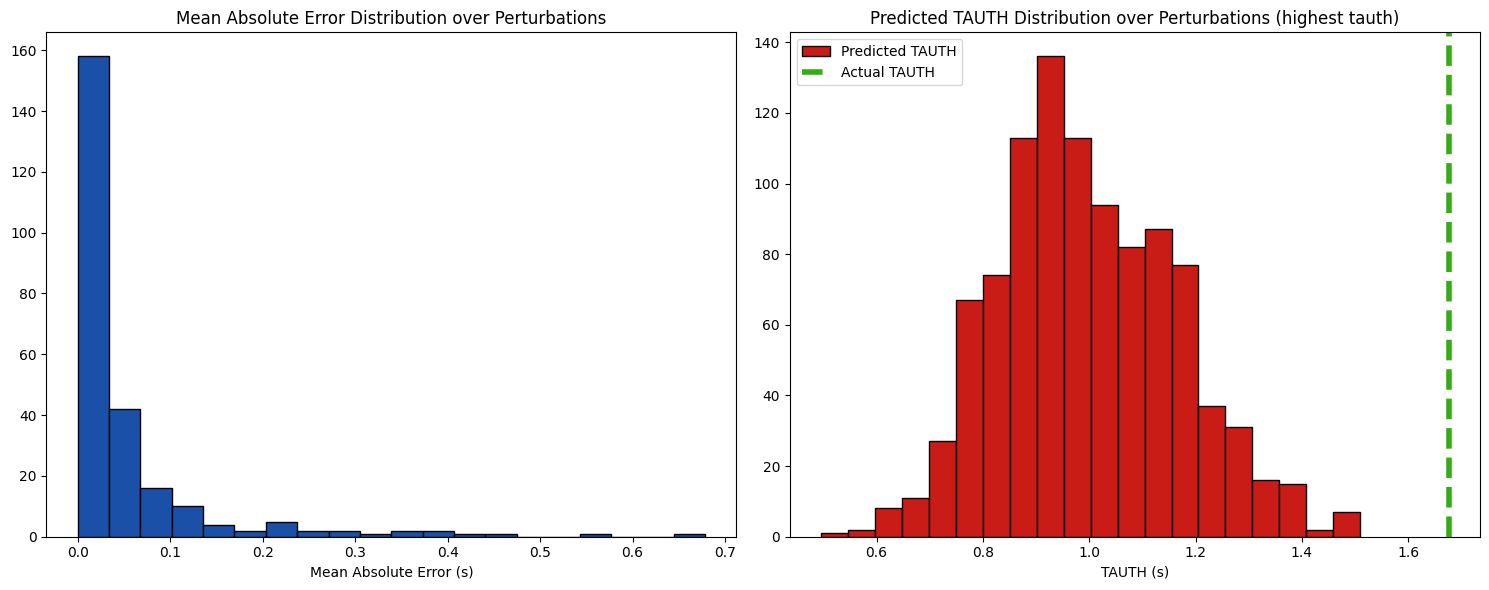

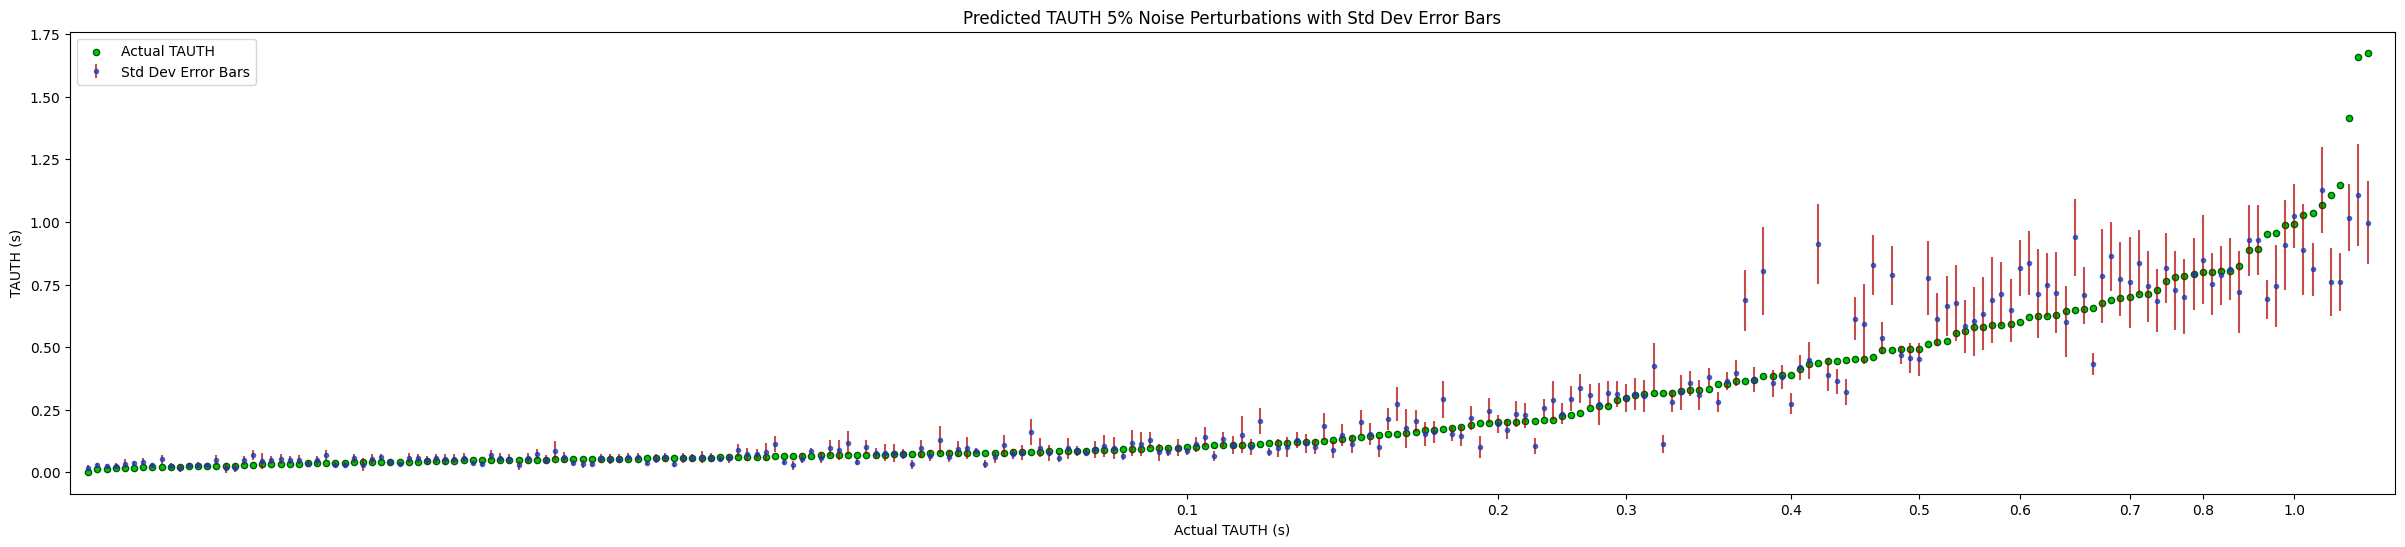

In [26]:
print(len(X_test))
experimental_test_idx = np.random.choice(len(X_test), size=250, replace=False)
experimental_test_X = X_test[experimental_test_idx]
experimental_test_y = y_test[experimental_test_idx]
args = np.argsort(experimental_test_y)
experimental_test_X = experimental_test_X[args]
experimental_test_y = experimental_test_y[args]
num_tests = 1000
noise_scale = 0.05
count = 0
errs = []
means = []
stds = []
for expX, expy in zip(experimental_test_X, experimental_test_y):
    perturb = np.random.normal(1, noise_scale, size=expX.shape + (num_tests,))
    expX_arr = np.tile(expX.reshape(-1,1), (1,num_tests))
    expX_perturbed = expX_arr * perturb
    to_predict = expX_perturbed.T
    pred_y = model.predict(to_predict)
    y_true = np.full(pred_y.shape, expy)
    _ = expy
    err = np.abs(np.mean(pred_y) - expy)
    errs.append(err)
    if err < 1*np.std(pred_y):
        count += 1
    means.append(np.mean(pred_y))
    stds.append(np.std(pred_y))
print(f"Number of times MAE < STD over perturbations: {count} out of {len(experimental_test_X)}")
print(f"Fraction: {count / len(experimental_test_X):.4f}")

fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].hist(errs, bins=20, alpha=1, color="#1A50A7", edgecolor='black')
ax[0].set_title("Mean Absolute Error Distribution over Perturbations")
ax[0].set_xlabel("Mean Absolute Error (s)")
ax[1].hist(pred_y, bins=20, alpha=1, label='Predicted TAUTH', color="#C91C16", edgecolor='black')
ax[1].axvline(_, color="#33AC15", linestyle='dashed', linewidth=4, label='Actual TAUTH')
ax[1].set_title("Predicted TAUTH Distribution over Perturbations (highest tauth)")
ax[1].set_xlabel("TAUTH (s)")
ax[1].legend()
plt.tight_layout()
print(f"Predicted TAUTH: {np.mean(pred_y):.4f}, Actual TAUTH: {_:.4f}")

taue_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
idxs = []
for taue in taue_list:
    idx = (np.abs(experimental_test_y - taue)).argmin()
    idxs.append(idx)

fig2, ax2 = plt.subplots(figsize=(30,6))
ax2.errorbar(range(len(means)), means, yerr=stds, fmt='o', color="#163AB37A", ecolor="#B10101", alpha=0.7, elinewidth=1.5, label='Std Dev Error Bars', markersize=3)
ax2.scatter(range(len(means)), experimental_test_y, s=20, alpha=1, edgecolors="#00580C", color="#00C900", label='Actual TAUTH')
ax2.legend()
ax2.set_xlim(-2, len(means)+2)
ax2.set_xticks(idxs)
ax2.set_xticklabels([f"{taue:.1f}" for taue in taue_list], fontsize=10)
ax2.set_xlabel("Actual TAUTH (s)")
ax2.set_ylabel("TAUTH (s)")
ax2.set_title("Predicted TAUTH 5% Noise Perturbations with Std Dev Error Bars")

rmse = root_mean_squared_error(experimental_test_y, means)
print(f"RMSE between Predicted Means and Actual TAUTH: {rmse:.6f}")

XGBoost MAE: 0.07742983730206522


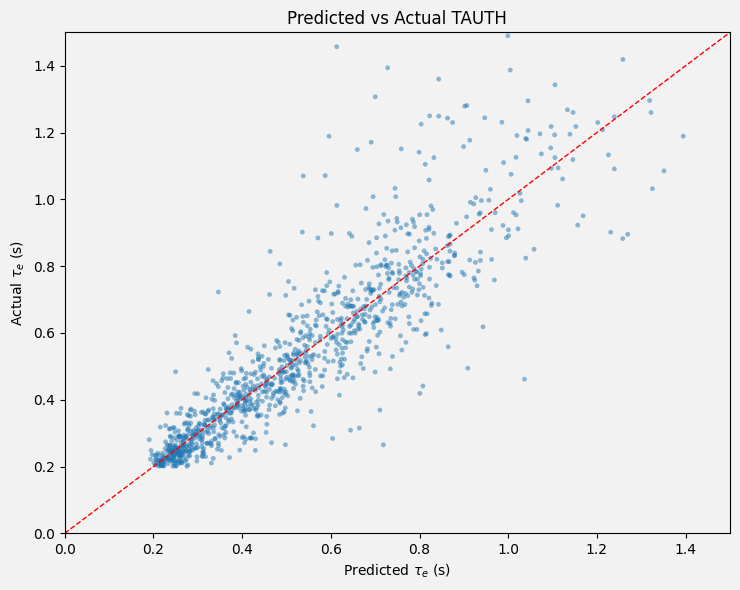

In [27]:
#import xgboost as xgb
import xgboost as xgb

cols = data.columns
#cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']
cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP', 'BGASZ', 'PGASA', 'BGASA', 'BGASA2', 'XGASZ', 'XGASA', 'BGASZ2']
data_new = data[cols_keep + ['TAUTH']]
X = data_new.drop(columns=['TAUTH'], axis=1).values
y = data_new['TAUTH'].values
X = X[y > 0.2]
y = y[y > 0.2]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE:", mae)

fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

1054
Number of times MAE < STD over perturbations: 120 out of 250
Fraction: 0.4800
Predicted TAUTH: 1.2714, Actual TAUTH: 1.5130


Text(0.5, 1.0, 'Predicted TAUTH 5% Noise Perturbations with Std Dev Error Bars')

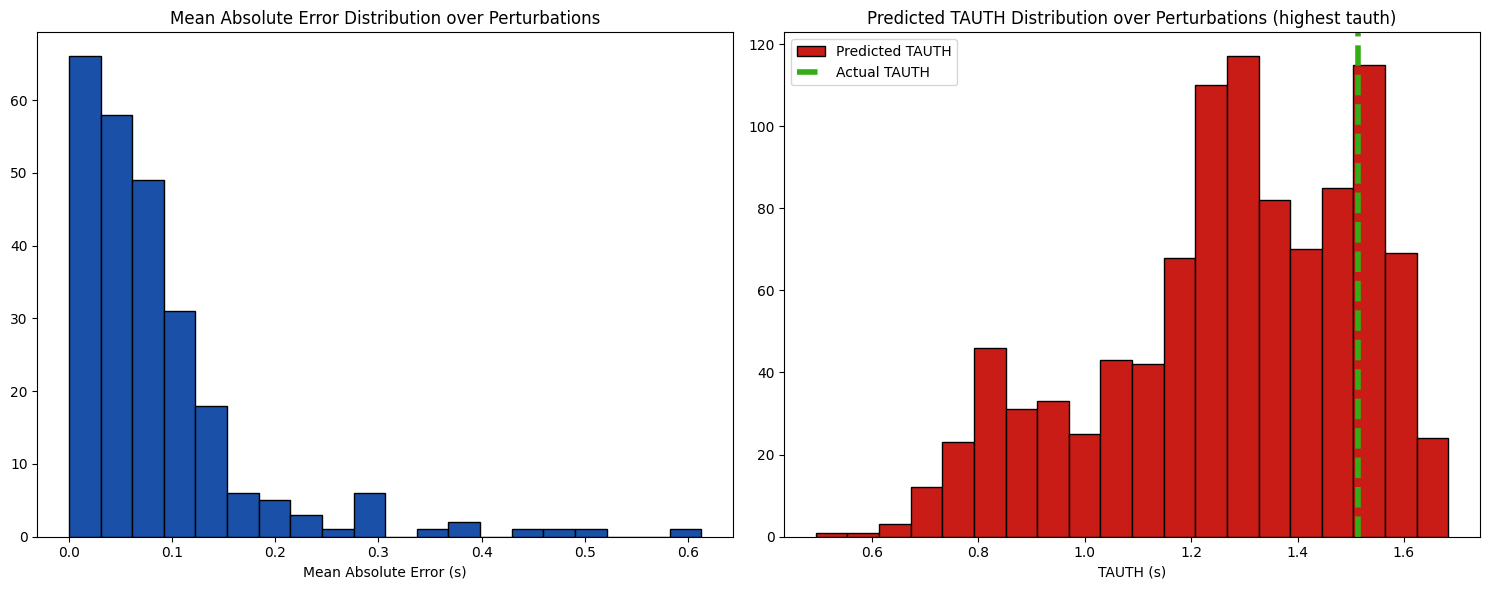

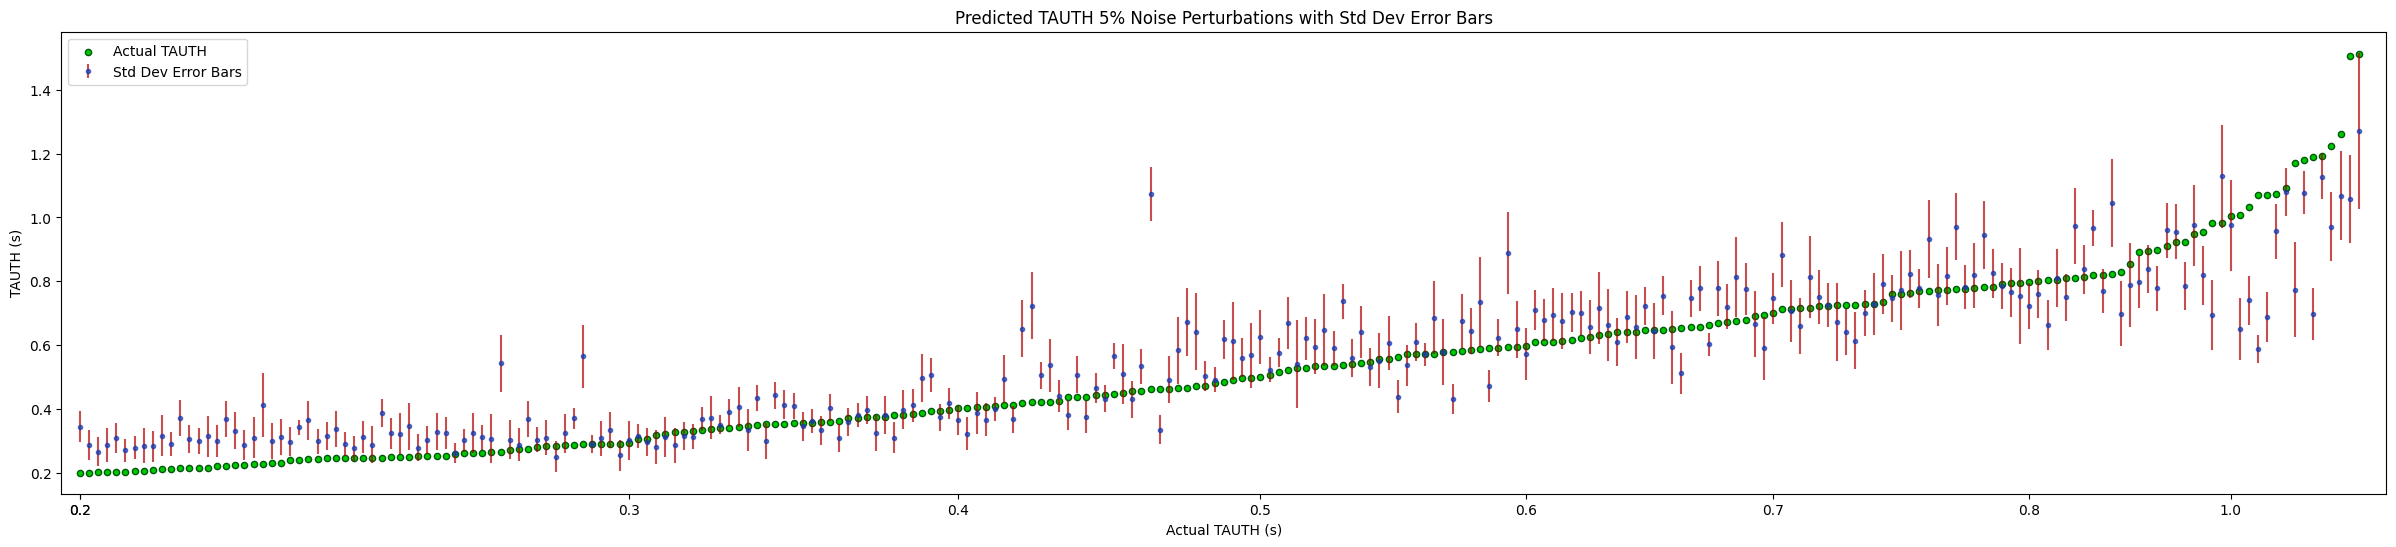

In [28]:
print(len(X_test))
experimental_test_idx = np.random.choice(len(X_test), size=250, replace=False)
experimental_test_X = X_test[experimental_test_idx]
experimental_test_y = y_test[experimental_test_idx]
args = np.argsort(experimental_test_y)
experimental_test_X = experimental_test_X[args]
experimental_test_y = experimental_test_y[args]
num_tests = 1000
noise_scale = 0.05
count = 0
errs = []
means = []
stds = []
for expX, expy in zip(experimental_test_X, experimental_test_y):
    perturb = np.random.normal(1, noise_scale, size=expX.shape + (num_tests,))
    expX_arr = np.tile(expX.reshape(-1,1), (1,num_tests))
    expX_perturbed = expX_arr * perturb
    to_predict = expX_perturbed.T
    pred_y = model.predict(to_predict)
    y_true = np.full(pred_y.shape, expy)
    _ = expy
    err = np.abs(np.mean(pred_y) - expy)
    errs.append(err)
    if err < 1*np.std(pred_y):
        count += 1
    means.append(np.mean(pred_y))
    stds.append(np.std(pred_y))
print(f"Number of times MAE < STD over perturbations: {count} out of {len(experimental_test_X)}")
print(f"Fraction: {count / len(experimental_test_X):.4f}")

fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].hist(errs, bins=20, alpha=1, color="#1A50A7", edgecolor='black')
ax[0].set_title("Mean Absolute Error Distribution over Perturbations")
ax[0].set_xlabel("Mean Absolute Error (s)")
ax[1].hist(pred_y, bins=20, alpha=1, label='Predicted TAUTH', color="#C91C16", edgecolor='black')
ax[1].axvline(_, color="#33AC15", linestyle='dashed', linewidth=4, label='Actual TAUTH')
ax[1].set_title("Predicted TAUTH Distribution over Perturbations (highest tauth)")
ax[1].set_xlabel("TAUTH (s)")
ax[1].legend()
plt.tight_layout()
print(f"Predicted TAUTH: {np.mean(pred_y):.4f}, Actual TAUTH: {_:.4f}")

taue_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
idxs = []
for taue in taue_list:
    idx = (np.abs(experimental_test_y - taue)).argmin()
    idxs.append(idx)

fig2, ax2 = plt.subplots(figsize=(30,6))
ax2.errorbar(range(len(means)), means, yerr=stds, fmt='o', color="#163AB37A", ecolor="#B10101", alpha=0.7, elinewidth=1.5, label='Std Dev Error Bars', markersize=3)
ax2.scatter(range(len(means)), experimental_test_y, s=20, alpha=1, edgecolors="#00580C", color="#00C900", label='Actual TAUTH')
ax2.legend()
ax2.set_xlim(-2, len(means)+2)
ax2.set_xticks(idxs)
ax2.set_xticklabels([f"{taue:.1f}" for taue in taue_list], fontsize=10)
ax2.set_xlabel("Actual TAUTH (s)")
ax2.set_ylabel("TAUTH (s)")
ax2.set_title("Predicted TAUTH 5% Noise Perturbations with Std Dev Error Bars")

XGBoost MAE: 0.08564451819233933


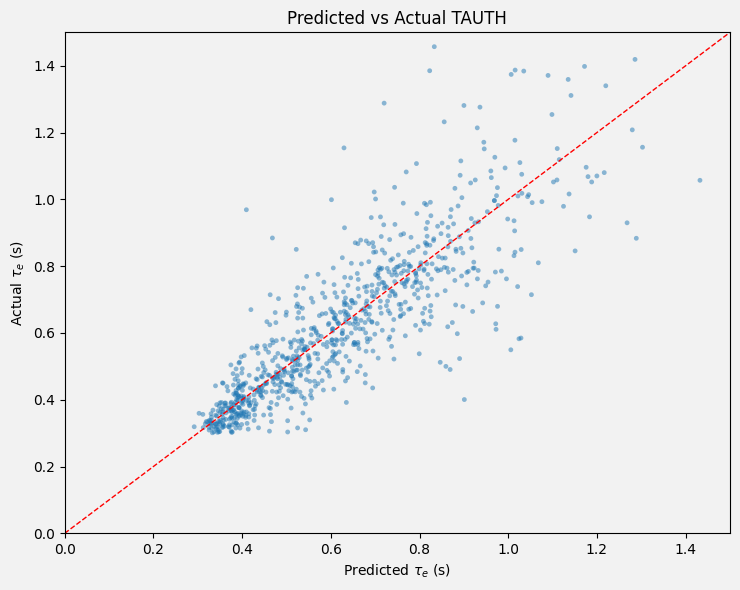

In [29]:
#import xgboost as xgb
import xgboost as xgb

cols = data.columns
#cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP']
cols_keep = ['RGEO', 'AMIN', 'KAPPA', 'KAREA', 'DELTAU', 'DELTAL', 'AREA', 'VOL', 'SURFFORM', 'SEPLIM', 'BT', 'IP', 'BGASZ', 'PGASA', 'BGASA', 'BGASA2', 'XGASZ', 'XGASA', 'BGASZ2']
data_new = data[cols_keep + ['TAUTH']]
X = data_new.drop(columns=['TAUTH'], axis=1).values
y = data_new['TAUTH'].values
X = X[y > 0.3]
y = y[y > 0.3]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE:", mae)

fig = plt.figure(figsize=(7.5,6))
fig.set_facecolor("#F2F2F2")
ax = plt.gca()
ax.set_facecolor("#F2F2F2")
# swap x/y here from what they'd normally be
plt.scatter(y_pred, y_test, s=12, alpha=0.5, edgecolors='none')

# red 45-degree line
plt.plot([0, 1.5], [0, 1.5], '--', linewidth=1, color='red')

# force both axes to run from 0 to 1
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.title("Predicted vs Actual TAUTH")
plt.xlabel(r"Predicted $\tau_e$ (s)")
plt.ylabel(r"Actual $\tau_e$ (s)")

plt.tight_layout()

827
Number of times MAE < STD over perturbations: 124 out of 250
Fraction: 0.4960
Predicted TAUTH: 0.8414, Actual TAUTH: 1.3850


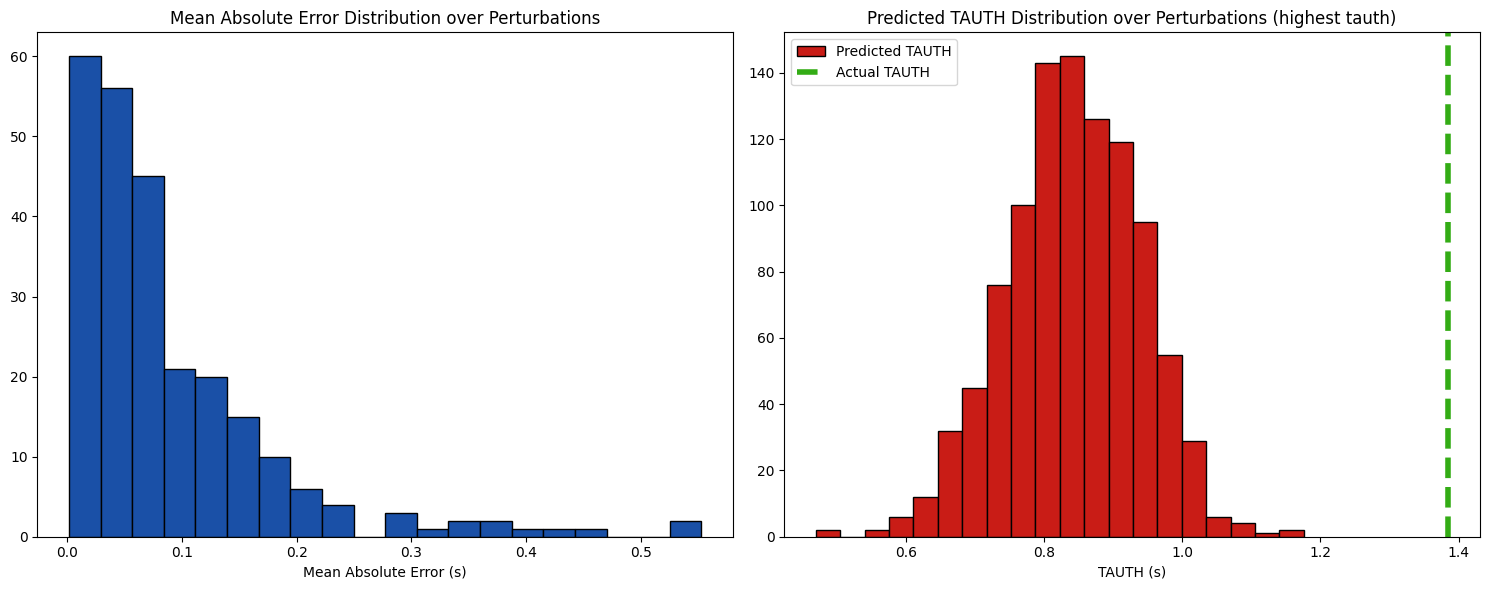

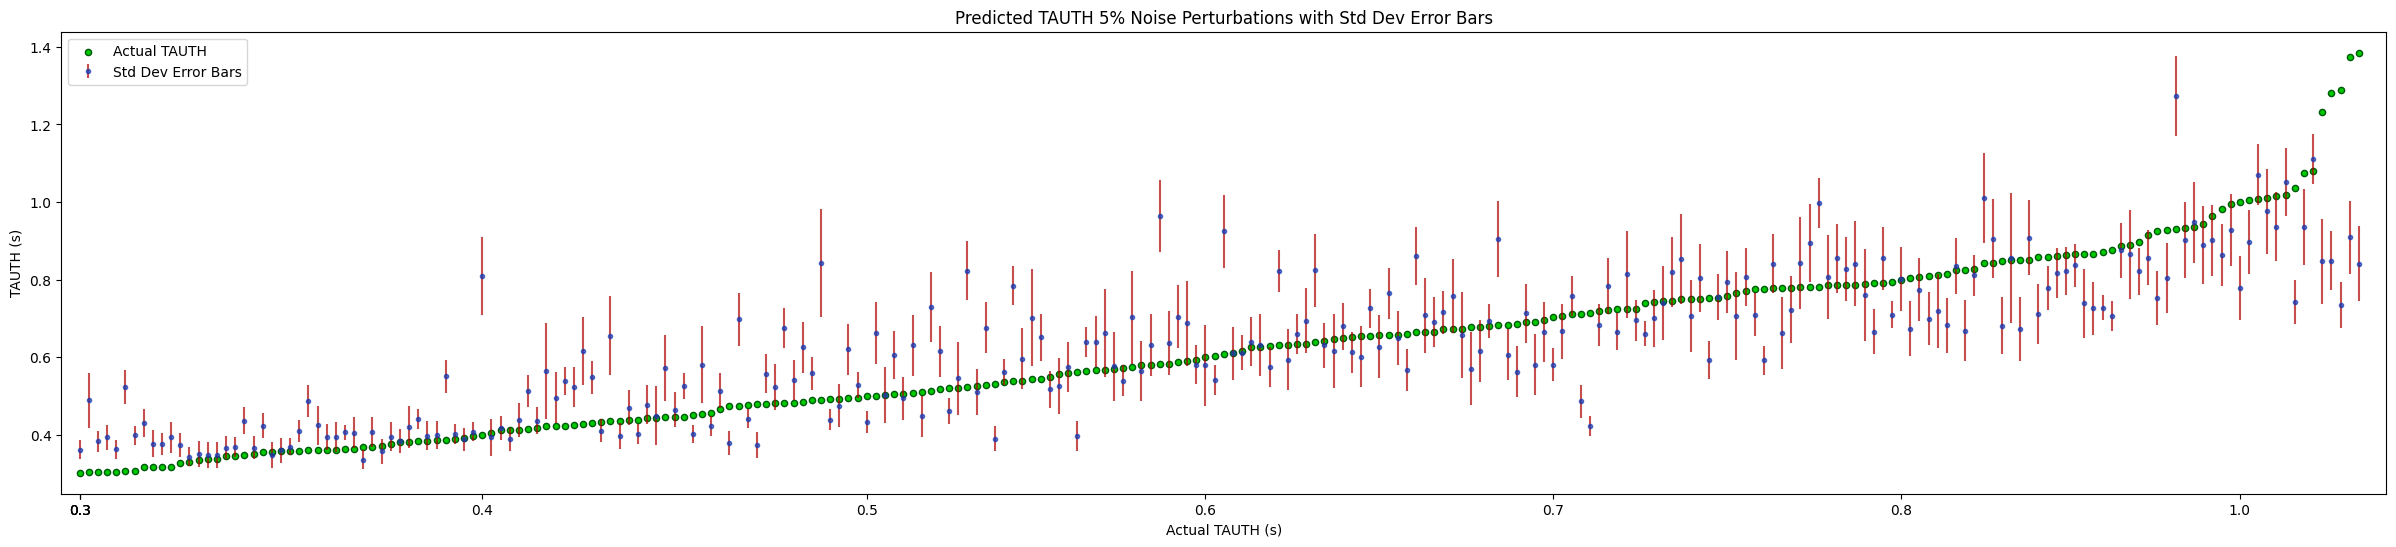

In [31]:
print(len(X_test))
experimental_test_idx = np.random.choice(len(X_test), size=250, replace=False)
experimental_test_X = X_test[experimental_test_idx]
experimental_test_y = y_test[experimental_test_idx]
args = np.argsort(experimental_test_y)
experimental_test_X = experimental_test_X[args]
experimental_test_y = experimental_test_y[args]
num_tests = 1000
noise_scale = 0.05
count = 0
errs = []
means = []
stds = []
for expX, expy in zip(experimental_test_X, experimental_test_y):
    perturb = np.random.normal(1, noise_scale, size=expX.shape + (num_tests,))
    expX_arr = np.tile(expX.reshape(-1,1), (1,num_tests))
    expX_perturbed = expX_arr * perturb
    to_predict = expX_perturbed.T
    pred_y = model.predict(to_predict)
    y_true = np.full(pred_y.shape, expy)
    _ = expy
    err = np.abs(np.mean(pred_y) - expy)
    errs.append(err)
    if err < 1*np.std(pred_y):
        count += 1
    means.append(np.mean(pred_y))
    stds.append(np.std(pred_y))
print(f"Number of times MAE < STD over perturbations: {count} out of {len(experimental_test_X)}")
print(f"Fraction: {count / len(experimental_test_X):.4f}")

fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].hist(errs, bins=20, alpha=1, color="#1A50A7", edgecolor='black')
ax[0].set_title("Mean Absolute Error Distribution over Perturbations")
ax[0].set_xlabel("Mean Absolute Error (s)")
ax[1].hist(pred_y, bins=20, alpha=1, label='Predicted TAUTH', color="#C91C16", edgecolor='black')
ax[1].axvline(_, color="#33AC15", linestyle='dashed', linewidth=4, label='Actual TAUTH')
ax[1].set_title("Predicted TAUTH Distribution over Perturbations (highest tauth)")
ax[1].set_xlabel("TAUTH (s)")
ax[1].legend()
plt.tight_layout()
print(f"Predicted TAUTH: {np.mean(pred_y):.4f}, Actual TAUTH: {_:.4f}")

taue_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
idxs = []
for taue in taue_list:
    idx = (np.abs(experimental_test_y - taue)).argmin()
    idxs.append(idx)

fig2, ax2 = plt.subplots(figsize=(30,6))
ax2.errorbar(range(len(means)), means, yerr=stds, fmt='o', color="#163AB37A", ecolor="#B10101", alpha=0.7, elinewidth=1.5, label='Std Dev Error Bars', markersize=3)
ax2.scatter(range(len(means)), experimental_test_y, s=20, alpha=1, edgecolors="#00580C", color="#00C900", label='Actual TAUTH')
ax2.set_xlim(-2, len(means)+2)
ax2.set_xticks(idxs)
ax2.set_xticklabels([f"{taue:.1f}" for taue in taue_list], fontsize=10)
ax2.set_xlabel("Actual TAUTH (s)")
ax2.set_ylabel("TAUTH (s)")
ax2.set_title("Predicted TAUTH 5% Noise Perturbations with Std Dev Error Bars")
#ax2.axhline(y=3.5, color='red', linestyle='--')
#ax2.axhline(y=3.7, color='red', linestyle='--', label='ITER Range')
ax2.legend()